### Step 1. Load Dependencies

In [23]:
# Load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from surprise import Reader, Dataset, SVD, SVDpp, evaluate
from sklearn.model_selection import cross_validate

### Step 2. Using books-crossings Dataset by Cai-Nicolas Ziegler

In [24]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packa

In [25]:
ratings.shape

(1149780, 3)

In [26]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


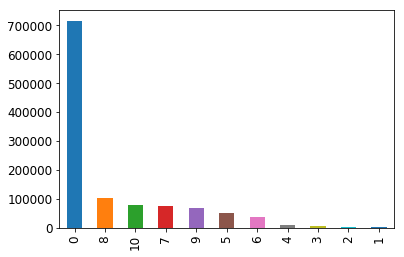

In [27]:
ratings.bookRating.value_counts().plot(kind = 'bar')

#### Let's get rid of data that has zero ratings and then build the recommendation engine

In [32]:
ratings1 = ratings.loc[ratings['bookRating'] != 0]

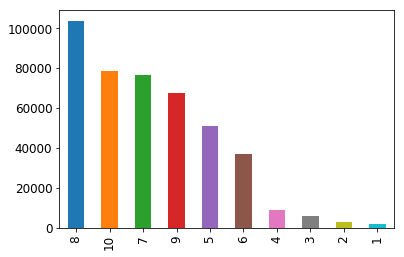

In [33]:
ratings1.bookRating.value_counts().plot(kind = 'bar')

### Step 3. Prepare dataset to use in Surprise

In [34]:
reader = Reader(line_format='user item rating', sep='\t')
data = Dataset.load_from_df(ratings1, reader=reader)

In [35]:
# Split the dataset into 3 folds
data.split(n_folds=3)

### Step 4a. Apply SVD Algorithm


In [36]:
# Choose SVD() algorithm
# Train and test reporting the RMSE and MAE scores
algo1 = SVD()
evaluate(algo1, data, measures=['RMSE', 'MAE'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 3.1927
MAE:  2.7740
------------
Fold 2
RMSE: 3.1806
MAE:  2.7596
------------
Fold 3
RMSE: 3.1913
MAE:  2.7719
------------
------------
Mean RMSE: 3.1882
Mean MAE : 2.7685
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [2.7740483146128412,
                             2.7595571889272477,
                             2.7718510271306336],
                            'rmse': [3.192688628351144,
                             3.1806340400156565,
                             3.1913271900362461]})

In [37]:
# Retrieve the trainset.
trainset = data.build_full_trainset()
algo1.fit(trainset)

In [39]:
# Predict a certain item
userid = str(276726)
itemid = '0155061224'
actual_rating = 5
print(algo1.predict(userid, itemid, actual_rating))

user: 276726     item: 0155061224 r_ui = 5.00   est = 5.00   {'was_impossible': False}


### Step 4b. Apply SVD++ Algorithm

In [40]:
# Choose SVDpp() algorithm
# Train and test reporting the RMSE and MAE scores
algo2 = SVDpp()
evaluate(algo2, data, measures=['RMSE', 'MAE'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVDpp.

------------
Fold 1
RMSE: 3.1933
MAE:  2.7748
------------
Fold 2
RMSE: 3.1813
MAE:  2.7603
------------
Fold 3
RMSE: 3.1920
MAE:  2.7727
------------
------------
Mean RMSE: 3.1889
Mean MAE : 2.7693
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [2.7747856920584755,
                             2.7603167417499348,
                             2.7726899571732333],
                            'rmse': [3.1932925089020272,
                             3.1813326863824489,
                             3.1919761221253484]})

In [41]:
# Retrieve the trainset.
trainset = data.build_full_trainset()
algo2.fit(trainset)

In [42]:
# Predict a certain item
userid = str(276726)
itemid = '0155061224'
actual_rating = 5
print(algo2.predict(userid, itemid, actual_rating))

user: 276726     item: 0155061224 r_ui = 5.00   est = 5.00   {'was_impossible': False}


## Interpretation and Results

### SVDpp algorithm generally gives better prediction than SVD algorithm however it took significantly more time to run than the latter. So it is computationally much more expensive. In this example, I got same estimated rating for the sample book (ISBN: 0155061224) of 5 with both algorithms. However, when I tried this algorithm on MovieLens dataset, there was a slight difference between the two predicted ratings with the rating from SVDpp algorithm being more accurate (closer to actual rating)

#### For userid = 276726
#### itemid = 0155061224
#### actual rating = 5
#### predicted rating based on SVD = 5
#### predicted rating based on SVDpp = 5

### Below are the results for movieLens dataset just for reference

#### For userid = 500
#### itemid = 500
#### actual rating = 3
#### predicted rating based on SVD = 3.6
#### predicted rating based on SVDpp = 3.22